# Predicting the number of your customers

## Introduction

Suppose you have a shop. Every month you count the total number of your customers who bought from your shop. To simplify, we think of people buying one unit from your shop or nothing. 


Your customers are of two types:
* some are "returning" customers (i.e. they also bought last month) and 
* the others are new (did not buy last month)

So we will not worry about customers who, say, bought two months ago but not last month.

In this notebook, we first generate the data ourselves (so that you fully understand the structure of the data) and then we analyze this data.

## Importing libraries

We first import the libraries that we need.

In [27]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Model

We will generate the data with the following model.

Let $x_t$ denote the logarithm of the number of customers in period $t$. We assume that $x_t$ evolves over time as follows:

$$
x_t = \rho x_{t-1} + u_t
$$

where $u_t$ is normally distributed with mean $\mu_u$ and standard deviation $\sigma_u$ and $\rho \in [0,1]$. Hence, there is a fraction $\rho$ of previous period customers that return to buy this period and there is an inflow $u_t$ of new customers in period $t$.


-------------

**Exercise**

What is an advantage of defining $x_t$ as the logarithm of the number of customers? [hint: what would you need to "worry" about if $x_t$ denotes the number of customers?]

--------------

We assume that both $\mu$ and $\rho$ are a function of the price that is charged. If you charge a high price, fewer customers will return and also the inflow of new customers will be lower.

We generate data for 24 months. The code below starts from today and generates dates with a Monthly frequency. We define how $\rho$ and $\mu$ depend on the price $p$ that the shop charges in a period.

Finally, we create a pandas dataframe `df_customers` with this data. 


In [6]:
number_of_periods = 24
todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date-datetime.timedelta(31*number_of_periods), periods=number_of_periods, freq='M')
columns = ['log number of customers']

def mu(m,p):
    return m*(1-p)

def rho(r,p):
    return r*(1-p)

sigma = 1.0

p_0 = [0.2]
p_1 = [0.6]
period_0 = 18
period_1 = number_of_periods+1-period_0
vector_p = period_0*p_0 + period_1*p_1

x_0 = 10
x = []
x.append(x_0)
for t in range(1,number_of_periods+1):
    u = np.random.normal(mu(2,vector_p[t]), sigma)
    x.append(rho(0.5,vector_p[t])*x[t-1]+u)
    
df_customers = pd.DataFrame(x[1:], index=index, columns=columns)

-----------

**Exercise**

Calculate the average number of customers over the period of 24 months. [hint: check the datacamp course on pandas or google "python pandas average" to see how to calculate an average in a dataframe]

-----------

In [19]:
len(vector_p)

25

In [20]:
df_customers['price'] = vector_p[1:]

In [10]:
np.exp(df_customers['log number of customers'].mean())

16.536399593664633

On the basis of the mean, you might conclude that you should expect around 0.2 customers on average

In [12]:
np.exp(df_customers['log number of customers'].median())

15.785245434937341

The median seems a bit more pessimistic

In [14]:
df_customers['MA_3'] = df_customers['log number of customers'].rolling(window=3).mean()
df_customers['MA_6'] = df_customers['log number of customers'].rolling(window=6).mean()

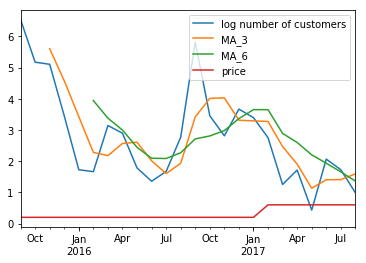

In [21]:
df_customers.plot()

In [16]:
df_customers

,log number of customers,MA_3,MA_6
2015-09-30,6.534853,NaN,NaN
2015-10-31,5.171559,NaN,NaN
2015-11-30,5.104127,5.603513,NaN
2015-12-31,3.451181,4.575622,NaN
2016-01-31,1.725287,3.426865,NaN
2016-02-29,1.662627,2.279698,3.941606
2016-03-31,3.142306,2.176740,3.376181
2016-04-30,2.894452,2.566462,2.996663
2016-05-31,1.782804,2.606521,2.443110
2016-06-30,1.356369,2.011208,2.093974


Add a column profits to the dataframe


In [22]:
df_customers['number of customers'] = np.exp(df_customers['log number of customers'])

In [25]:
df_customers


,log number of customers,MA_3,MA_6,price,number of customers,profits
2015-09-30,6.534853,NaN,NaN,0.2,688.732584,68.873258
2015-10-31,5.171559,NaN,NaN,0.2,176.189223,17.618922
2015-11-30,5.104127,5.603513,NaN,0.2,164.700190,16.470019
2015-12-31,3.451181,4.575622,NaN,0.2,31.537621,3.153762
2016-01-31,1.725287,3.426865,NaN,0.2,5.614131,0.561413
2016-02-29,1.662627,2.279698,3.941606,0.2,5.273145,0.527314
2016-03-31,3.142306,2.176740,3.376181,0.2,23.157215,2.315722
2016-04-30,2.894452,2.566462,2.996663,0.2,18.073597,1.807360
2016-05-31,1.782804,2.606521,2.443110,0.2,5.946507,0.594651
2016-06-30,1.356369,2.011208,2.093974,0.2,3.882070,0.388207


assume that your costs equal 0.1; calculate profits


In [24]:
costs = 0.1
df_customers['profits'] = (df_customers['price']-costs)*df_customers['number of customers']

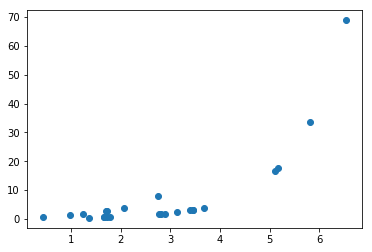

In [31]:
plt.scatter(df_customers['log number of customers'],df_customers['profits'])
plt.show()